# Example 06 - WidebandSig53 with YOLOv8 Detector
This notebook showcases using the WBSig53 dataset to train a YOLOv8 model.

---

## Import Libraries
We will import all the usual libraries, in addition to Ultralytics. You can install Ultralytics with:
```bash
pip install ultralytics
```

In [1]:
from ultralytics import YOLO
from torchsig.utils.yolo_train import *

In [2]:
from torchsig.datasets.wideband_sig53 import WidebandSig53
from torchsig.transforms.transforms import Spectrogram, SpectrogramImage, Normalize, Compose, Identity
from ultralytics import YOLO
from PIL import Image
import numpy as np

## Prepare YOLO trainer and Model
Next, the datasets are rewritten to disk that is Ultralytics YOLO compatible. See [Ultralytics: Train Custom Data - Organize Directories](https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#23-organize-directories) to learn more. 

Additionally, create a yaml file for dataset configuration. See [Ultralytics: Train Custom Data - Create dataset.yaml](https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#21-create-datasetyaml)

Download desired YOLO model from [Ultralytics Models](https://docs.ultralytics.com/models/). We will use YOLOv8, specifically `yolov8n.pt`

---

### Explanation of the `overrides` Dictionary

The `overrides` dictionary is used to customize the settings for the Ultralytics YOLO trainer by specifying specific values that override the default configurations. Below is a breakdown of the dictionary:

```python
overrides = {
    'model': 'yolov8n.pt',
    'epochs': 100,
    'imgsz': 512,
    'data': 'wbdata.yaml',
    'device': 0, 
    'single_cls': True
}
```
A .yaml is necessary for training. Look at wbdata.yaml in the examples directory. It will contain the path to your torchsig data.

In [3]:
overrides = {'model': 'yolov8n.pt', 'epochs': 5, 'imgsz': 512, 'data': 'wbdata.yaml', 'device': 0, 'single_cls': True}

In [4]:
trainer = Yolo_Trainer(overrides=overrides)

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB, 81038MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=wbdata.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

## Train
Train YOLO. See [Ultralytics Train](https://docs.ultralytics.com/modes/train/#train-settings) for training hyperparameter options.

---

In [5]:
trainer.train()

Overriding model.yaml nc=80 with nc=53

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)


Loading label caches from /weka/pvallance/git_clones/torchsig-internal-dev/examples/datasets/wideband_sig53
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000175, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.49G      2.214      5.045       1.82         55        512: 100%|██████████| 16/16 [00:01<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.32it/s]

                   all        250       1061          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.47G      1.953      4.921      1.643         62        512: 100%|██████████| 16/16 [00:01<00:00, 14.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 19.97it/s]

                   all        250       1061          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.53G      1.874      4.655      1.545         52        512: 100%|██████████| 16/16 [00:01<00:00, 15.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 19.61it/s]

                   all        250       1061          1    0.00189      0.501      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.51G      1.695      4.168      1.455         66        512: 100%|██████████| 16/16 [00:01<00:00, 15.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.44it/s]

                   all        250       1061      0.603      0.066      0.339        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.51G      1.632      3.842      1.379         57        512: 100%|██████████| 16/16 [00:01<00:00, 15.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 13.63it/s]

                   all        250       1061      0.499      0.228      0.359      0.229



5 epochs completed in 0.003 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB, 81038MiB)
Model summary (fused): 168 layers, 3,015,983 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.05it/s]


                   all        250       1061          1    0.00189      0.501      0.401
                   ook        250       1061          1    0.00189      0.501      0.401
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train2


## Evaluation
Check model performance from training. From here, you can use the trained model to test on prepared data (numpy image arrays of spectrograms)

Will load example from Torchsig

model_path is path to best.pt from your training session. Path is printed at the end of training.

---

## Instantiate WBSig53 Dataset
After generating the WBSig53 dataset (see `03_example_widebandsig53_dataset.ipynb`), we can instantiate it with the needed transforms. Change `root` to dataset path.

---

In [6]:
test_path = './datasets/wideband_sig53'

transform = Compose([
    Spectrogram(nperseg=512, noverlap=0, nfft=512, mode='psd'),
    Normalize(norm=np.inf, flatten=True),
    SpectrogramImage(), 
    ])
target_transform = Compose([
    ])

test_dataset = WidebandSig53(
            root=test_path, 
            train=True, 
            impaired=True,
            transform=transform,
            target_transform=target_transform
        )

### Load model 
The model path is printed after training. Use the best.pt weights

In [25]:

import os
d_path = './runs/detect/'
all_subdirs = [d_path + d for d in os.listdir(d_path) if os.path.isdir(d_path + d)]
latest_subdir = max(all_subdirs, key=os.path.getmtime)
model_path = f'{latest_subdir}/weights/best.pt'
model = YOLO(model_path)

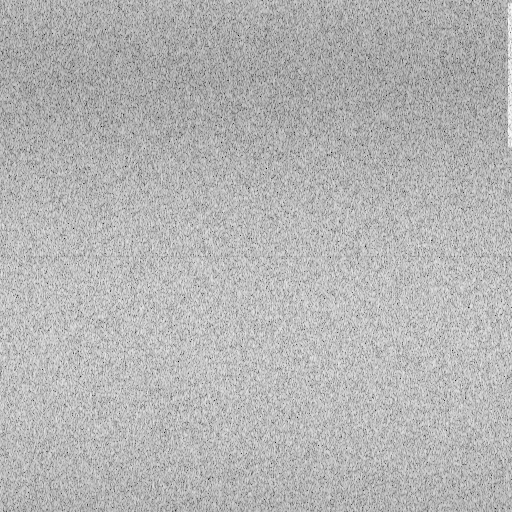

In [26]:
# View data before inference
sample, _ = test_dataset[0]
img = Image.fromarray(sample)
img

In [27]:
# Inference will be saved to path printed after predict. Change "show" to "True" to print results after inference. 
# Warning: possible cv2 dependency issues for "show=True" 

results = model.predict(img, save=True, imgsz=512, conf=0.5, show=False)


0: 512x512 (no detections), 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
